In [1]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import pandas as pd
import numpy as np

export_path = "./latex/illustr/domain_4/"
# plots a finite element mesh
def plot_fem_mesh(nodes_x, nodes_y, elements, linewidth: float = 0.2):
    # print(nodes_x)
    it = 0
    for element in elements:
        x = [nodes_x[element[0]], nodes_x[element[1]], nodes_x[element[2]]]
        y = [nodes_y[element[0]], nodes_y[element[1]], nodes_y[element[2]]]
        # print(x , y)
        plt.fill(x, y, edgecolor='black', linewidth = linewidth, fill=False)
        it += 1

<h1> Calfem 0.01

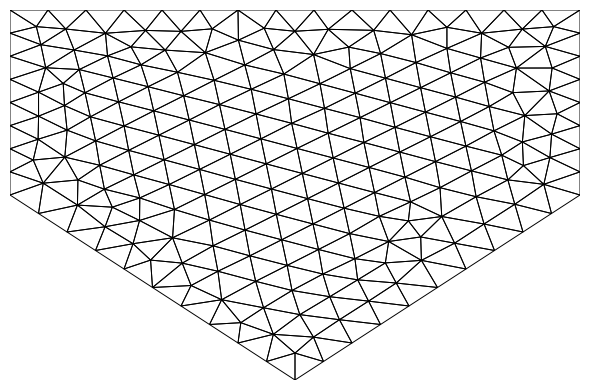

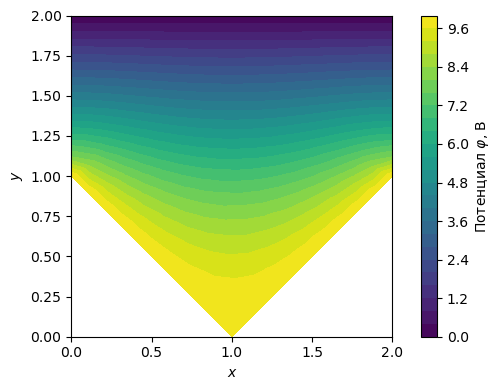

In [55]:
domain_name = "Test_domain_4_mesh001_calfem"

df_x_y = pd.read_csv("./domains/domain_4/mesh001_calfem/mesh_nodes.csv")
df_z = pd.read_csv("./output/domain_4/mesh001_calfem/Test_domain_4_mesh001_calfem_solution.csv")
df_elements = pd.read_csv("./domains/domain_4/mesh001_calfem//mesh_polygons.csv")
for element in df_elements.values:
    element -= 1;


plt.rcParams["figure.figsize"] = [4, 4]
plt.rcParams["figure.autolayout"] = True

plt.xlim(0, 2)
plt.ylim(0, 2)

plot_fem_mesh(df_x_y["x"].values, df_x_y["y"].values, df_elements.values, 0.7)

plt.axis('off')
plt.savefig(export_path + domain_name + "_net.pdf", transparent=True)
plt.show()
plt.close()

plt.rcParams["figure.figsize"] = [6, 4]
plt.rcParams["figure.autolayout"] = True

triangulation = tri.Triangulation(df_x_y["x"].values, df_x_y["y"].values, triangles=df_elements.values)
plt.tricontourf(triangulation, df_z["sol"].values, levels = 25)
#plot_fem_mesh(df_x_y["x"].values, df_x_y["y"].values, df_elements.values, 0.7)

plt.axis("image")
plt.colorbar(label = "Потенциал $\\varphi$, В" )
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.savefig(export_path + domain_name + ".png", dpi = 300, transparent=True)
plt.show()


<h1> Calfem 0.01 (3 in row)

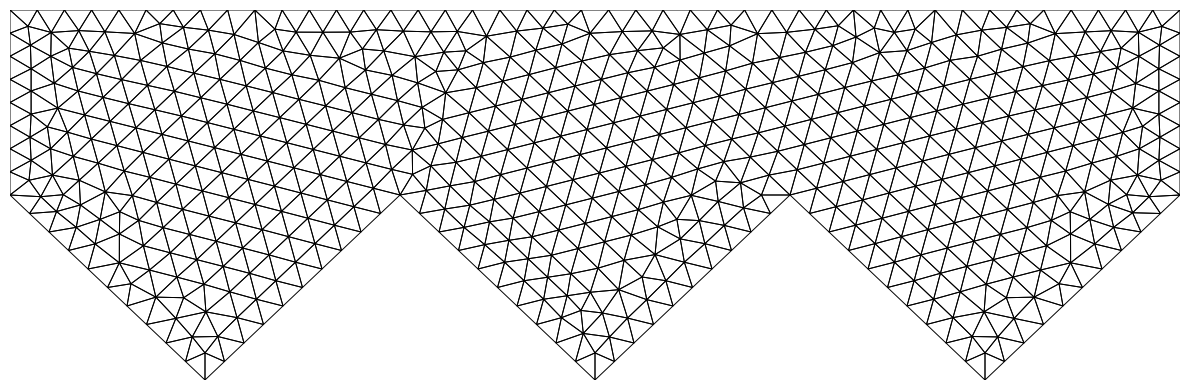

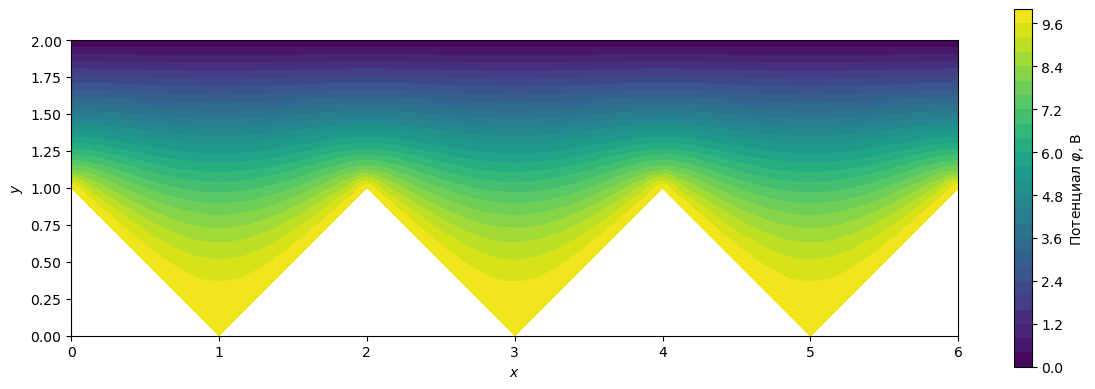

In [54]:
domain_name = "Test_domain_4_mesh001_3_in_row_calfem"

df_x_y = pd.read_csv("./domains/domain_4/mesh001_3_in_row_calfem/mesh_nodes.csv")
df_z = pd.read_csv("./output/domain_4/mesh001_3_in_row_calfem/Test_domain_4_mesh001_3_in_row_calfem_solution.csv")
df_elements = pd.read_csv("./domains/domain_4/mesh001_3_in_row_calfem//mesh_polygons.csv")
for element in df_elements.values:
    element -= 1;


plt.rcParams["figure.figsize"] = [12, 4]
plt.rcParams["figure.autolayout"] = True

plot_fem_mesh(df_x_y["x"].values, df_x_y["y"].values, df_elements.values, 0.7)
plt.xlim(0, 6)
plt.ylim(0, 2)
plt.axis('off')
plt.savefig(export_path + domain_name + "_net.pdf", transparent=True)
plt.show()
plt.close()

plt.rcParams["figure.figsize"] = [12, 4]
plt.rcParams["figure.autolayout"] = True

triangulation = tri.Triangulation(df_x_y["x"].values, df_x_y["y"].values, triangles=df_elements.values)
plt.tricontourf(triangulation, df_z["sol"].values, levels = 25)
#plot_fem_mesh(df_x_y["x"].values, df_x_y["y"].values, df_elements.values, 0.7)

plt.axis("image")
plt.colorbar(label = "Потенциал $\\varphi$, В" )
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.savefig(export_path + domain_name + ".png", dpi = 300, transparent=True)
plt.show()
